In [1]:
import polygon_basic

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import sklearn

import patsy
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import sklearn.metrics as metrics

from shapely.geometry import Polygon
import geopandas as gpd


from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

(array([ 0.0952381 , -0.57142857, -1.        , -0.42857143, -0.0952381 ,
         0.57142857,  1.        ,  0.42857143]),
 array([ 1.        ,  0.66666667, -0.08333333, -0.75      , -1.        ,
        -0.66666667,  0.08333333,  0.75      ]))

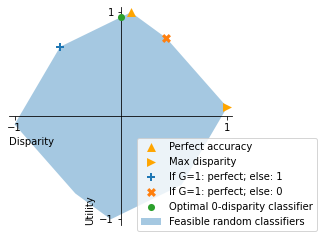

In [3]:
lam=1

n_1pos=15
n_1neg=20
n_2pos=5
n_2neg=10

polygon_basic.plot_basic_polygon(n_1pos,n_1neg,n_2pos,n_2neg,lam=lam,filename='figures/polygon-toy.png',save=False,useaccuracy=False)



In [ ]:
util_cutoff = 

# ADULT 

In [3]:
# Data wrangling

adult = pd.read_csv('adult/adult.data',names = ['age',
'workclass',
'fnlwgt',
'education',
'educationnum',
'maritalstatus',
'occupation',
'relationship',
'race',
'sex',
'capitalgain',
'capitalloss',
'hoursperweek',
'nativecountry','target'],index_col=False)
adult['y'] = np.where(adult['target']==' <=50K',0,1)

y_withsex,X_withsex = patsy.dmatrices('y ~ sex + maritalstatus + hoursperweek + education + workclass - 1',data=adult)
y,X = patsy.dmatrices('y ~ maritalstatus + hoursperweek + education + workclass - 1',data=adult)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5,random_state=1)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_withsex, y_withsex, test_size = .5,random_state=1)

#Which index is the sex variable?
s_index = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5,random_state=1)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_withsex, y_withsex, test_size = .5,random_state=1)

X_train, X_evaluate, y_train, y_evaluate = train_test_split(X_train, y_train, test_size = .5,random_state=1)
X_train_s, X_evaluate_s, y_train_s, y_evaluate_s = train_test_split(X_train_s, y_train_s, test_size = .5,random_state=1)

#Which index is the sex variable?
s_index = 1

X_test_male = X_test[X_test_s[:,s_index]==1]
y_test_male = y_test[X_test_s[:,s_index]==1]
X_test_female = X_test[X_test_s[:,s_index]==0]
y_test_female = y_test[X_test_s[:,s_index]==0]

X_train_male = X_train[X_train_s[:,s_index]==1]
y_train_male = y_train[X_train_s[:,s_index]==1]
X_train_female = X_train[X_train_s[:,s_index]==0]
y_train_female = y_train[X_train_s[:,s_index]==0]

X_evaluate_male = X_evaluate[X_evaluate_s[:,s_index]==1]
y_evaluate_male = y_evaluate[X_evaluate_s[:,s_index]==1]
X_evaluate_female = X_evaluate[X_evaluate_s[:,s_index]==0]
y_evaluate_female = y_evaluate[X_evaluate_s[:,s_index]==0]


In [4]:
#result_df = pd.read_csv('result_data/result_df_info'+suffixes[0]+'.csv')
#starting_util = np.mean(result_df['evaluate_utility'])
#starting_disp = np.mean(result_df['evaluate_disparity'])

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

Text(0.5, 1.0, 'Evaluation set')

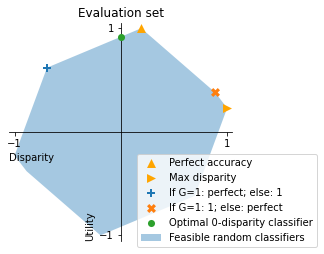

In [5]:
lam=1

n_1pos=sum(y_evaluate_male)[0]
n_1neg=sum(1-y_evaluate_male)[0]
n_2pos=sum(y_evaluate_female)[0]
n_2neg=sum(1-y_evaluate_female)[0]

basic_xs, basic_ys = polygon_basic.plot_basic_polygon(n_1pos,n_1neg,n_2pos,n_2neg,lam=lam,save=False)
plt.title("Evaluation set")
#plt.fill(basic_xs, basic_ys)
#result_df = pd.read_csv('result_data/result_df_info'+suffixes[0])

In [6]:
models=['LR','RF','DT']
searches=['sample']#['randomseed','sample']
datasets = ['adult']#['adult', 'germancredit']
suffixes = []

polygon_empirics_df = pd.DataFrame({'model':[-1]*10,'search':[-1]*10,'dataset':[-1]*10,'starting_disp':[-1]*10,'starting_util':[-1]*10})
#interpretation_df.loc[:,'avg_disparity_change']=[-1]*10
#print(interpretation_df)
index = 0

for m in models:
    for s in searches:
        for d in datasets:
            if m=='LR' and s=='randomseed':
                continue
            if m=='DT' and s=='randomseed':#linewidth=0,
                continue
            suffixes = suffixes + [m+s+d]
            polygon_empirics_df.loc[index,'model']=m
            polygon_empirics_df.loc[index,'search']=s
            polygon_empirics_df.loc[index,'dataset']=d
            index = index + 1

In [7]:
suffixes

['LRsampleadult', 'RFsampleadult', 'DTsampleadult']

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

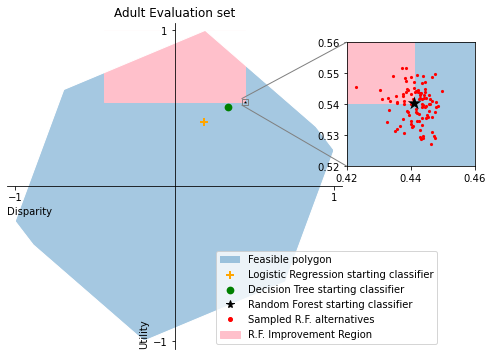

In [8]:
fig, ax = plt.subplots(figsize=[6,6])
plt.title("Adult Evaluation set")
plt.fill(basic_xs, basic_ys,alpha=0.4,label='Feasible polygon',color='#1f77b4',linewidth=0,zorder=-1)

starting_utils = []
starting_disps = []
utils = []
disps = []
colors = ['orange','black','green','yellow']
markers = ['P','*','o','D']
labels=['Logistic Regression starting classifier','Random Forest','Decision Tree starting classifier']


for s in range(len(suffixes)):
    result_df = pd.read_csv('result_data/result_df_info'+suffixes[s]+'.csv')
    utils=utils + [result_df['evaluate_utility'].sample(100,replace=False)]
    starting_util = np.mean(result_df['evaluate_utility'])
    starting_utils = starting_utils + [starting_util]
    starting_disp = np.mean(result_df['evaluate_disparity'])
    starting_disps = starting_disps + [starting_disp]
    disps=disps + [result_df['evaluate_disparity'].sample(100,replace=False)]
    if suffixes[s]!='RFsampleadult':
        sns.scatterplot([starting_disp], [starting_util],s=60,marker=markers[s],color=colors[s],label=labels[s],linewidth=0)
    else:
        sns.scatterplot([starting_disp], [starting_util],s=12,marker=markers[s],color=colors[s],zorder=2,linewidth=0)
        #for s in range(len(suffixes)):
#sns.scatterplot([starting_disp], [starting_util],s=50,marker='*',color=colors,linewidth=0,label=suffixes[s])

#Just for the legend
ax.plot(5,5,'*',color='black',markersize=8,label='Random Forest starting classifier',zorder=10)
ax.plot(5,5,'.',color='red',markersize=8,label='Sampled R.F. alternatives')


rf_index=-2
x_improvement = [starting_disps[rf_index],-starting_disps[rf_index],-starting_disps[rf_index],starting_disps[rf_index]]
y_improvement = [starting_utils[rf_index],starting_utils[rf_index],1,1]
ax.fill(x_improvement,y_improvement, color='pink',alpha=1,label='R.F. Improvement Region',zorder=-.5)
sns.scatterplot(disps[rf_index],utils[rf_index],s=1,marker='.',color='red',linewidth=0)

x_white = [0,1,1,-1,-1,0]+list(basic_xs)+[list(basic_xs)[0]]+[0]#xa[selective_women_all_men_predictor_disp,perfect_disp,all_women_selective_men_predictor_disp,
           #all_women_selective_men_predictor_disp,selective_women_all_men_predictor_disp]
y_white = [1,1,-lam,-lam,1,1]+list(basic_ys)+[list(basic_ys)[0]]+[1]#[selective_women_all_men_predictor_utility,perfect_utility,all_women_selective_men_predictor_utility,
          #starting_classifier_utility+.5,starting_classifier_utility+.5]
ax.fill(x_white,y_white, color='white',alpha=1,zorder=-.2)
    
    
ax.set_ylabel("Utility",loc='bottom')
ax.set_xlabel("Disparity",loc='left')
ax.set_xticks([-1,1])#-.5,.5,1])
ax.set_xlim([-1.05,1.05])
ax.set_yticks([-1,1])#.5,-.5,1])
ax.set_ylim([-1.05,1.05])
# Move left y-axis and bottom x-axis to center, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

""# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#Plot alternative LDA candidates
axins = zoomed_inset_axes(ax, 20, 
                   bbox_to_anchor=(1, 0.5, .5, .5),
                   bbox_transform=ax.transAxes, loc='center left'#) #loc=[1,1]
                         )
extent=[.4,.75,.4,.75]

axins.fill([-1,-1,1,1],[-lam,1,1,-lam], alpha=0.4)
axins.fill(x_improvement,y_improvement, color='pink',alpha=1)
axins.scatter(disps[rf_index],utils[rf_index], s=10,color='red',zorder=1.5,linewidth=0#,marker='^'
              #extent=extent, 
              #origin="lower"
             )
axins.scatter(starting_disps[rf_index],starting_utils[rf_index],marker='*',color='black',s=200,zorder=20,linewidth=0)


mark_inset(ax, axins, loc1=3, loc2=2, fc="none", ec="0.5",zorder=100)
axins.set_ylim([.52,.56])
#axins.set_yticks([.52,.56])
axins.set_xlim([.42,.46])
#axins.set_xticks([.42,.46])

ax.legend(loc='lower right',bbox_to_anchor=(.8, 0, .5, .5),)



plt.savefig('figures/test-disparity-polygon-empirical-adult.png',bbox_inches='tight',dpi=800)

plt.show()



In [9]:
disps

[8104    0.183029
 7221    0.195917
 9586    0.181453
 9026    0.178509
 9787    0.177822
           ...   
 3073    0.178495
 3632    0.187388
 4172    0.182428
 7248    0.170276
 2020    0.187903
 Name: evaluate_disparity, Length: 100, dtype: float64,
 9758    0.431029
 3488    0.441881
 786     0.443404
 2623    0.447237
 1849    0.444551
           ...   
 486     0.435686
 1149    0.436756
 7172    0.443018
 55      0.446199
 6833    0.443719
 Name: evaluate_disparity, Length: 100, dtype: float64,
 1940    0.333478
 3428    0.325770
 3303    0.315404
 6540    0.338748
 5280    0.340723
           ...   
 6716    0.352438
 2583    0.327792
 6164    0.343986
 389     0.335111
 9968    0.334519
 Name: evaluate_disparity, Length: 100, dtype: float64]

# GERMAN CREDIT

In [10]:
# Data wrangling

attribute_list=[
    'checking_account_category'
    ,'duration_in_month'
    ,'credit_history_category'
    ,'purpose_category'
    ,'credit_amount'
    ,'savings_account_category'
    ,'unemployment_category'
    ,'installment_rate_percentage_income'
    ,'sex_and_marriage_status_category'
    ,'other_debtors_guarantors_category'
    ,'present_residence_duration'
    ,'property_category'
    ,'age'
    ,'installment_plans_category'
    ,'housing_category'
    ,'number_existing_credits_at_bank'
    ,'job_category'
    ,'number_of_people_liable_maintenance'
    ,'telephone_category'
    ,'foreign_category'
    ,'y'
]
german = pd.read_csv('~/Python Projects/LDA_empirics/statlog+german+credit+data 2/german.data'
                     ,names=attribute_list
                     ,index_col=False
                     ,delimiter=' '
                     #,header=0
                    )
german['y']=german['y']-1
german['sex_category']=np.logical_not(np.logical_or(np.equal(german['sex_and_marriage_status_category'],'A92'), np.equal(german['sex_and_marriage_status_category'],'A95')))
german['single_category']=np.logical_or(np.equal(german['sex_and_marriage_status_category'],'A93'), np.equal(german['sex_and_marriage_status_category'],'A95'))

y_withsex,X_withsex = patsy.dmatrices('y ~ sex_category + checking_account_category + duration_in_month + credit_history_category + purpose_category + credit_amount + savings_account_category + unemployment_category + installment_rate_percentage_income + other_debtors_guarantors_category + present_residence_duration + property_category + age + installment_plans_category + housing_category + number_existing_credits_at_bank + job_category + number_of_people_liable_maintenance + telephone_category + foreign_category + single_category',data=german)
y,X = patsy.dmatrices('y ~ checking_account_category + duration_in_month + credit_history_category + purpose_category + credit_amount + savings_account_category + unemployment_category + installment_rate_percentage_income + other_debtors_guarantors_category + present_residence_duration + property_category + age + installment_plans_category + housing_category + number_existing_credits_at_bank + job_category + number_of_people_liable_maintenance + telephone_category + foreign_category + single_category',data=german)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5,random_state=1)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_withsex, y_withsex, test_size = .5,random_state=1)

X_train, X_evaluate, y_train, y_evaluate = train_test_split(X_train, y_train, test_size = .5,random_state=1)
X_train_s, X_evaluate_s, y_train_s, y_evaluate_s = train_test_split(X_train_s, y_train_s, test_size = .5,random_state=1)

#Which index is the sex variable?
s_index = 1

X_test_male = X_test[X_test_s[:,s_index]==1]
y_test_male = y_test[X_test_s[:,s_index]==1]
X_test_female = X_test[X_test_s[:,s_index]==0]
y_test_female = y_test[X_test_s[:,s_index]==0]

X_train_male = X_train[X_train_s[:,s_index]==1]
y_train_male = y_train[X_train_s[:,s_index]==1]
X_train_female = X_train[X_train_s[:,s_index]==0]
y_train_female = y_train[X_train_s[:,s_index]==0]

X_evaluate_male = X_evaluate[X_evaluate_s[:,s_index]==1]
y_evaluate_male = y_evaluate[X_evaluate_s[:,s_index]==1]
X_evaluate_female = X_evaluate[X_evaluate_s[:,s_index]==0]
y_evaluate_female = y_evaluate[X_evaluate_s[:,s_index]==0]


In [11]:
result_df = pd.read_csv('result_data/result_df_info'+suffixes[0]+'.csv')
starting_util = np.mean(result_df['evaluate_utility'])
starting_disp = np.mean(result_df['evaluate_disparity'])

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

Text(0.5, 1.0, 'Evaluation set')

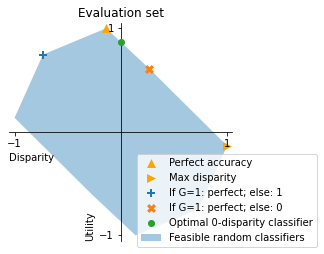

In [12]:
lam=1

n_1pos=sum(y_evaluate_male)[0]
n_1neg=sum(1-y_evaluate_male)[0]
n_2pos=sum(y_evaluate_female)[0]
n_2neg=sum(1-y_evaluate_female)[0]

basic_xs, basic_ys = polygon_basic.plot_basic_polygon(n_1pos,n_1neg,n_2pos,n_2neg,lam=lam,save=False)
plt.title("Evaluation set")
#plt.fill(basic_xs, basic_ys)
#result_df = pd.read_csv('result_data/result_df_info'+suffixes[0])

In [13]:
models=['LR','RF','DT']
searches=['sample']#['randomseed','sample']
datasets = ['germancreditlessfeatures']#['adult', 'germancredit']
suffixes = []

polygon_empirics_df = pd.DataFrame({'model':[-1]*10,'search':[-1]*10,'dataset':[-1]*10,'starting_disp':[-1]*10,'starting_util':[-1]*10})
#interpretation_df.loc[:,'avg_disparity_change']=[-1]*10
#print(interpretation_df)
index = 0

for m in models:
    for s in searches:
        for d in datasets:
            if m=='LR' and s=='randomseed':
                continue
            if m=='DT' and s=='randomseed':
                continue
            suffixes = suffixes + [m+s+d]
            polygon_empirics_df.loc[index,'model']=m
            polygon_empirics_df.loc[index,'search']=s
            polygon_empirics_df.loc[index,'dataset']=d
            index = index + 1

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

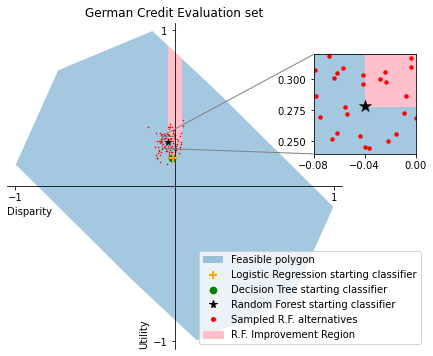

In [14]:
fig, ax = plt.subplots(figsize=[6,6])
plt.title("German Credit Evaluation set")
plt.fill(basic_xs, basic_ys,alpha=0.4,label='Feasible polygon',color='#1f77b4',linewidth=0,zorder=-1)

starting_utils = []
starting_disps = []
utils = []
disps = []
colors = ['orange','black','green','yellow']
markers = ['P','*','o','D']
labels=['Logistic Regression starting classifier','Random Forest','Decision Tree starting classifier']
zorders=[20.1,20,20]
for s in range(len(suffixes)):
    result_df = pd.read_csv('result_data/result_df_info'+suffixes[s]+'.csv')
    utils=utils + [result_df['evaluate_utility'].sample(100,replace=False)]
    starting_util = np.mean(result_df['evaluate_utility'])
    starting_utils = starting_utils + [starting_util]
    starting_disp = np.mean(result_df['evaluate_disparity'])
    starting_disps = starting_disps + [starting_disp]
    disps=disps + [result_df['evaluate_disparity'].sample(100,replace=False)]
    if suffixes[s]!='RFsamplegermancreditlessfeatures':
        sns.scatterplot([starting_disp], [starting_util],s=60,marker=markers[s],color=colors[s],label=labels[s],zorder=zorders[s],linewidth=0)
    else:
        sns.scatterplot([starting_disp], [starting_util],s=80,marker=markers[s],color=colors[s],linewidth=0)
#for s in range(len(suffixes)):
#sns.scatterplot([starting_disp], [starting_util],s=50,marker='*',color=colors,linewidth=0,label=suffixes[s])

#Just for the legend
ax.plot(5,5,'*',color='black',markersize=8,label='Random Forest starting classifier')
ax.plot(500,500,'.',color='red',markersize=8,label='Sampled R.F. alternatives')

rf_index=-2
x_improvement = [starting_disps[rf_index],-starting_disps[rf_index],-starting_disps[rf_index],starting_disps[rf_index]]
y_improvement = [starting_utils[rf_index],starting_utils[rf_index],1,1]
ax.fill(x_improvement,y_improvement, color='pink',alpha=1,label='R.F. Improvement Region',zorder=-.5)
sns.scatterplot(disps[rf_index],utils[rf_index],s=14,marker='.',color='red',linewidth=0)

x_white = [0,1,1,-1,-1,0]+list(basic_xs)+[list(basic_xs)[0]]+[0]#xa[selective_women_all_men_predictor_disp,perfect_disp,all_women_selective_men_predictor_disp,
           #all_women_selective_men_predictor_disp,selective_women_all_men_predictor_disp]
y_white = [1,1,-lam,-lam,1,1]+list(basic_ys)+[list(basic_ys)[0]]+[1]#[selective_women_all_men_predictor_utility,perfect_utility,all_women_selective_men_predictor_utility,
          #starting_classifier_utility+.5,starting_classifier_utility+.5]
ax.fill(x_white,y_white, color='white',alpha=1,zorder=-.2)

    
ax.set_ylabel("Utility",loc='bottom')
ax.set_xlabel("Disparity",loc='left')
ax.set_xticks([-1,1])#-.5,.5,1])
ax.set_xlim([-1.05,1.05])
ax.set_yticks([-1,1])#.5,-.5,1])
ax.set_ylim([-1.05,1.05])
# Move left y-axis and bottom x-axis to center, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

""# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#Plot alternative LDA candidates
axins = zoomed_inset_axes(ax, 8, 
                   bbox_to_anchor=(.9, 0.5, .5, .5),
                   bbox_transform=ax.transAxes, loc='center left'#) #loc=[1,1]
                         )
extent=[.4,.75,.4,.75]

axins.fill([-1,-1,1,1],[-lam,1,1,-lam], alpha=0.4)
axins.fill(x_improvement,y_improvement, color='pink',alpha=1)
ax.scatter(disps[rf_index],utils[rf_index], s=10,color='red',linewidth=0,zorder=0,marker='.')

axins.scatter(disps[rf_index],utils[rf_index], s=20,color='red',linewidth=0,zorder=1#,marker='^'
              #extent=extent, 
              #origin="lower"
             )
axins.scatter(starting_disps[rf_index],starting_utils[rf_index],marker='*',color='black',linewidth=0,s=200)


mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")
axins.set_xlim([-.08,0])
#axins.set_yticks([.52,.56])
axins.set_ylim([.24,.32])
axins.set_xticks([-.08,-.04,0])

ax.legend(loc='lower right',bbox_to_anchor=(.75, 0, .5, .5),)

plt.savefig('figures/test-disparity-polygon-germancredit.png',bbox_inches='tight',dpi=800)

plt.show()


In [15]:
len(adult)

32561